# **Fuel Consumption Prediction**

**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
column_name = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model Year", "Origin"]

In [ ]:
data = pd.read_csv(r"C:\Users\ilhan\Desktop\auto_mpg.data", names = column_name, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)

Araçların farklı yakıt tüketimleri bulunmaktadır.

Araçların ağırlığı, motorundaki silindir sayısı, beygir gücü gibi özelliklerine bağlı olarak değişmektedir.

Araçların özelliklerine bağlı olarak yakıt tüketim tahmini yapılacaktır.

In [ ]:
data = data.rename(columns = {"MPG":"target"})

**MPG:** Miles per Gallon 

MPG sütununa bağlı olarak tahmin yapılacağından ismi target olarak değiştirilir.

In [ ]:
print(data.head())

   target  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


**target (miles per gallon):** arabanın 1 milde ne kadar galon harcadığının bilgisi

**Cylinders:** arabanın motorunda bulunan silindir sayısı, 4-8 arasında değişir.

**Displacement:** araba motorunun büyüklüğü

**Horsepower:** motorun beygir gücü

**Weight:** araba ağırlığı (pound)

**Acceleration:** arabanın hızlanma süresi

**Model Year:** model yılı

**Origin:** nerede üretildiğinin bilgisi, 1-3 arasında 3 farklı ülke bilgisi bulunmaktadır.

In [ ]:
print("Data shape: ",data.shape)

Data shape:  (398, 8)


8 sütun ve 398 sample bulunmaktadır. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Sütunlarda bulunan bütün veriler float ve integer olmak üzere sayısal değerdedir.

Ancak origin sütunu one hot encoding ile categorical olarak düşünülüp yeni featurelar extract edilecektir.

Horsepower sütununda 6 tane missing value olduğu görülür.

In [ ]:
describe = data.describe()
describe

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Araba modellerinin 70 yılından 82 yılına kadar olduğu görülür.

target sütununda mean değerinin median değerinden büyük olduğu görülür, pozitif skewnesslık olabilir.

Bu değerlendirmeyi diğer sütunlar için de yapmadan önce standardization yapmak daha doğru olacaktır.

Linear bir model eğitileceği için skewnesslığın giderilmesi gerekir.

In [ ]:
print(data.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


Horsepower sütunundaki 6 tane missing value'yu drop etmek datanın dengesini bozabilir ve veri kaybına neden olur.

Bu yüzden mean değeri ile doldurulacaktır.

In [ ]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())

In [ ]:
print(data.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


Datadaki hiçbir missing value kalmadığı görülür.

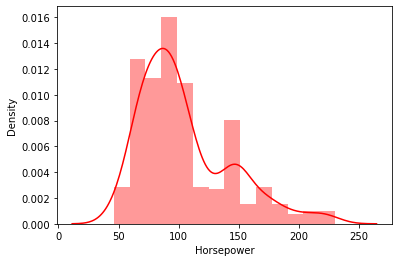

In [ ]:
sns.distplot(data.Horsepower, color="r")
plt.show()

Horsepower feature'ında sağa doğru uzanan kuyruktan pozitif skewnesslık olduğu anlaşılır.

Describe methodundaki sonuçlara bakıldığında mean değeri 104, median değeri 93'tür. Buradan da skewnesslık olduğu anlaşılır.

**Exploratory Data Analysis**

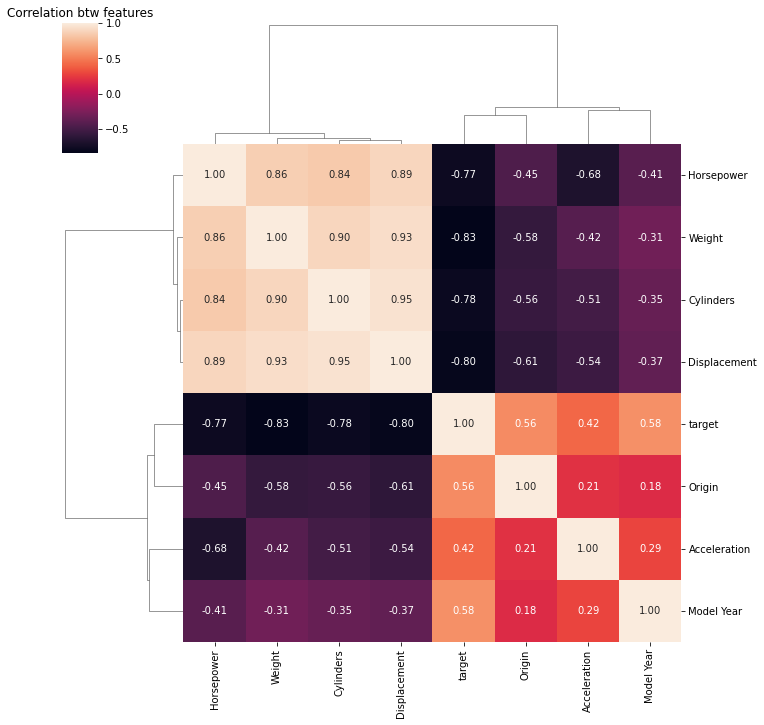

In [ ]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

Cluster map ile featurelar arasındaki ilişki incelenmek istendiğinde;

Displacement ve Horsepower featurelearı arasındaki corelation en yüksektir.  
       
Displacement, Weight, Cylinders, Horsepower featureları arasında pozitif yönlü yüksek bir corelation vardır.

Bu featureların target ile arasında negatif yönlü yüksek bir corelation vardır.

Arabanın ağırlığı arttıkça hızlanması zorlaşacağından weight ve acceleration featureları arasında negatif yönlü bir corelation görülür.

weight,silindir, horsepower

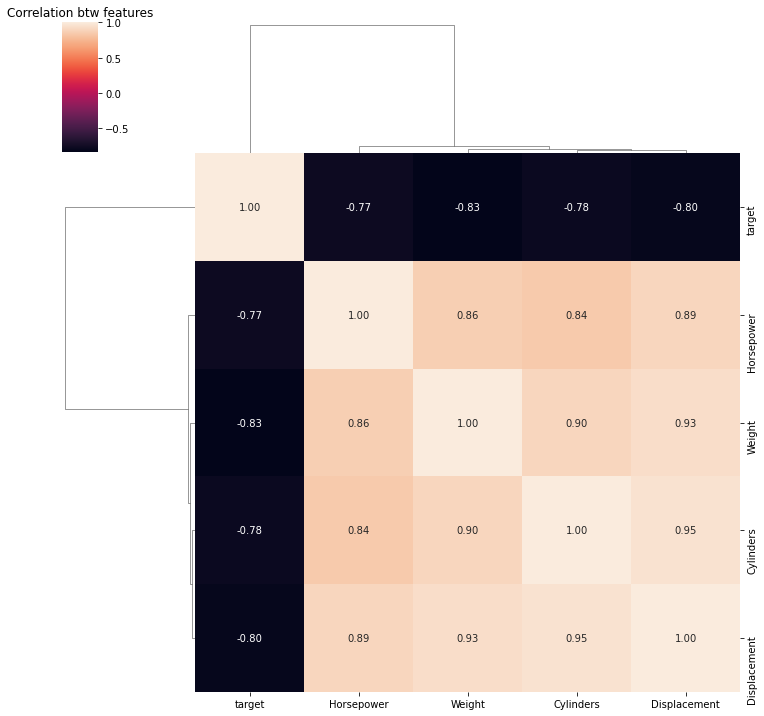

In [ ]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

0.75 değerine threshold koyulup target dependent variable'ı ile aralarındaki corelation yüksek olan independent featurelara bakılacaktır.

absolute parametresi ile threshold değeri mutlak değer içerisine alınır. Çünkü negatif yönlü yüksek corelationlar da dahil edilmek istenmiştir.

**Multicollinearity:** Aralarındaki corelation'ın çok yüksek olduğu en az iki feature'ın bulunmasıdır.

Aralarındaki ilişki çok yüksek olan featurelar kısmen birbirinin aynısı olacağından bu durum modeli yanlış yönlendirebilir.

Displacement, Weight, Cylinders, Horsepower featureları arasındaki yüksek corelationdan dolayı multicollinearity vardır.

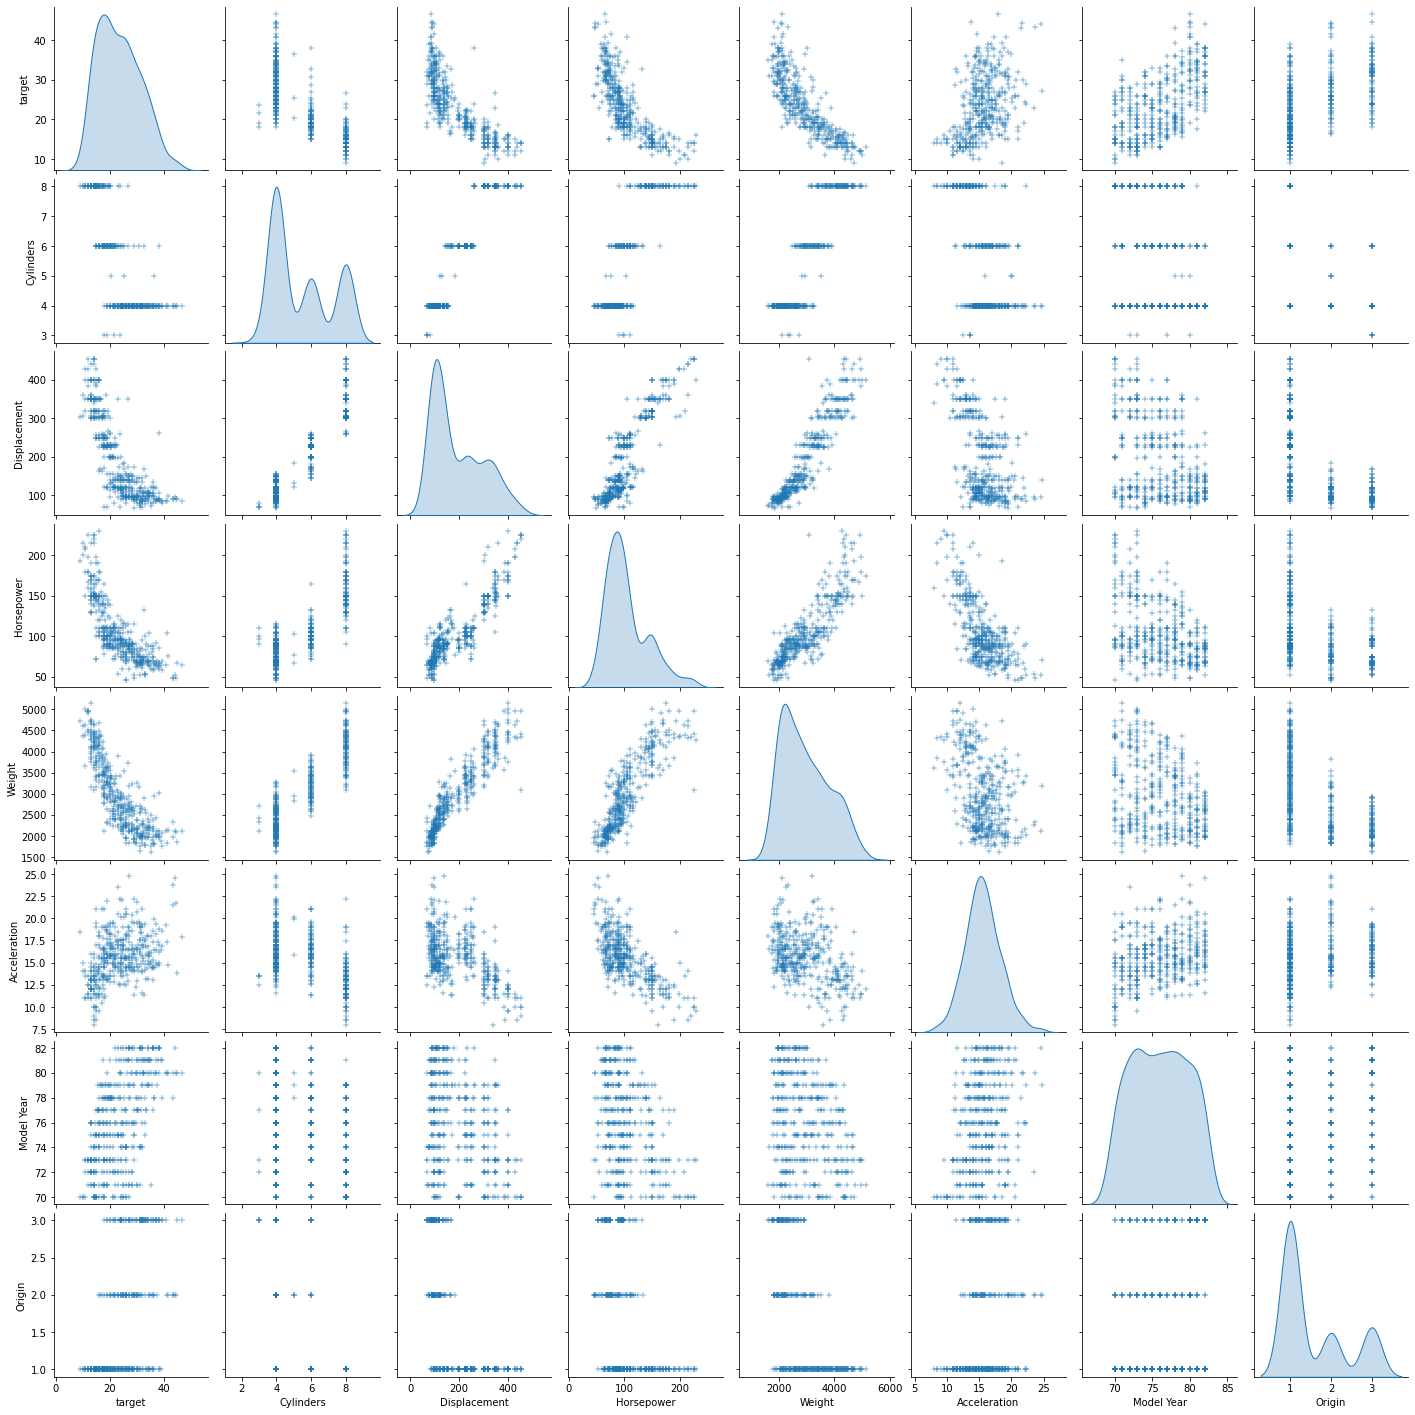

In [ ]:
sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

target feature'ına bakıldığında pozitif skewnesslık görülür.

Cylinders feature'ında 4,6,8 olmak üzere categorical veri bulunduğu görülür, feature extraction kısmında cylinders feature'ı ayrılabilir.

target ile Displacement, Weight, Horsepower featureları arasında negatif yönlü bir corelation vardır, cylinders ile yoktur.

Origin de cylinders gibi 3 çeşit veri barındırdığından categorical olarak düşünülebilir.

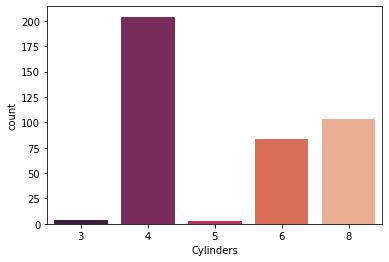

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64


In [ ]:
plt.figure()
sns.countplot(data["Cylinders"],palette="rocket")
plt.show()
print(data["Cylinders"].value_counts())

Categorical olarak ayrılmak istenen cylinders feature'ı count plot ile görselleştirilmiştir.

Seaborn'da count plot çizdirildiğinde tam değerler gözükmediği için count methodu ile bakılmıştır.

Verilerin yüksek çoğunluğunun 4,6,8'de toplandığı görülür.

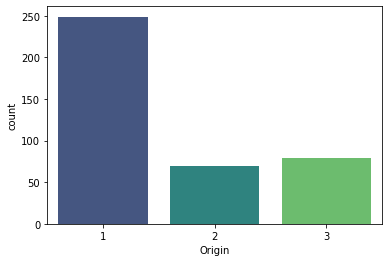

1    249
3     79
2     70
Name: Origin, dtype: int64


In [ ]:
plt.figure()
sns.countplot(data["Origin"],palette="viridis")
plt.show()
print(data["Origin"].value_counts())

Origin feature'ında 3 çeşit değer vardır, categorical olarak düşünülebilir.

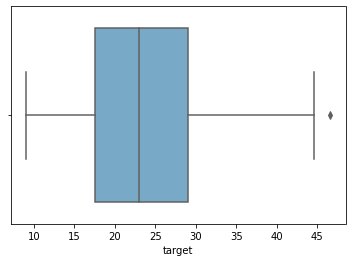

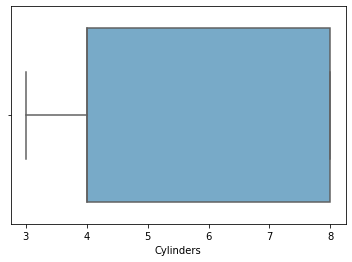

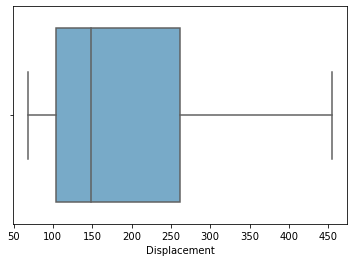

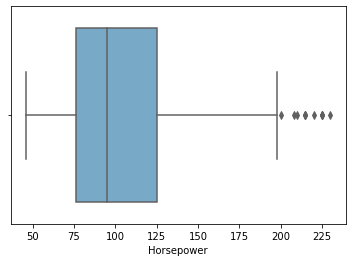

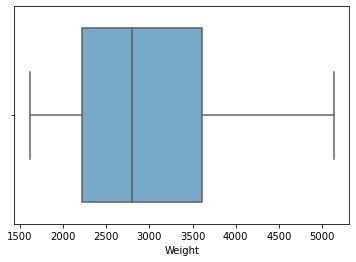

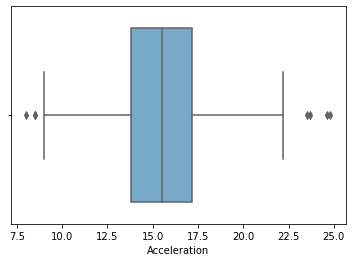

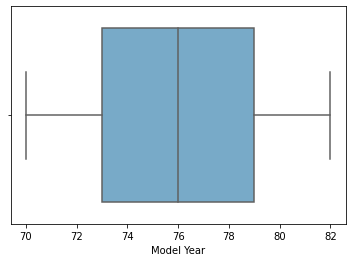

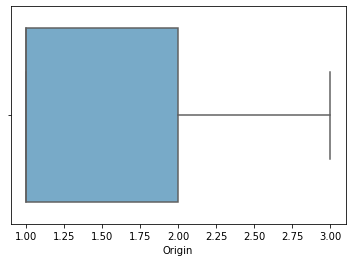

In [ ]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v",palette="Blues")
    plt.show()

Acceleration ve Horsepower featurelarında outlierlar görülmektedir.

**Outlier Detection and Removal**

In [ ]:
threshold = 1.5

In [ ]:
horsepower_desc = describe["Horsepower"]
horsepower_desc

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

First quartile(Q1) ile third quartile(Q3) arasındaki mesafe interquartile range'dir.

Inter quartile'ın hesaplanması için 4. ve 6. indekslerde bulunan 25% (first quartile) ve 75% (third  quartile) değerlerinin çıkarılması gerekir.

In [ ]:
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp #q3-q1

In [ ]:
top_limit_hp = q3_hp + threshold*IQR_hp #q3+1.5IQR
bottom_limit_hp = q1_hp - threshold*IQR_hp #q1-1.5IQR

inner quartile ve upper quartile değerleri bulunur.

In [ ]:
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
data = data[filter_hp]

Horsepower feature'ındaki değerler inner quartile ve upper quartile'ın arasında ise outlier değildir. Bu değerler filtrelenerek dataya eşitlenir.

In [ ]:
data.shape

(388, 8)

398 sample'ın 10 tanesi outlier olarak tespit edilip çıkarılmıştır.

Aynı işlemler Acceleration feature'ı için de yapılır.

In [ ]:
acceleration_desc = describe["Acceleration"]
acceleration_desc

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [ ]:
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc #q3-q1

In [ ]:
top_limit_acc = q3_acc + threshold*IQR_acc #q3+1.5IQR
bottom_limit_acc = q1_acc - threshold*IQR_acc #q1-1.5IQR

In [ ]:
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top= data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top
data = data[filter_acc]

In [ ]:
data.shape

(380, 8)

8 sample outlier olarak tespit edilip çıkarılmıştır.

**Feature Engineering: Skewness**

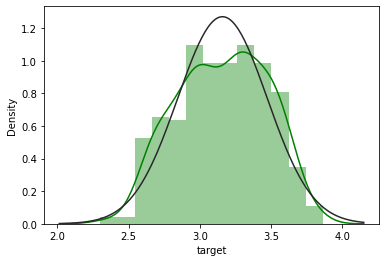

In [ ]:
from scipy.stats import norm
sns.distplot(data.target, fit = norm, color="g")
plt.show()

Normal dağılımda mean, median ve mod değerleri birbirine eşittir.

Pozitif skewnesslıkta line sağa doğru uzar, negatif skewnesslıkta line sola doğru uzar, en tepedeki değer mod değeridir.

Verinin 1. momenti mean, 2. momenti standart sapma, 3. momenti skewness değerini verir.

Skewness değeri 1'den büyükse pozitif skewnesslık vardır, -1'den küçükse de negatif skewnesslık vardır.

target variable'ında normal bir dağılım olsaydı siyah line olarak gözükecekti.

Grafik sola doğru toplanma olduğundan ve kuyruk sağa doğru uzadığından pozitif skewnesslık vardır.

In [ ]:
(mu, sigma) = norm.fit(data["target"])
print("mu (mean): {}, sigma (standart sapma) = {}".format(mu, sigma))

mu (mean): 23.711315789473684, sigma (standart sapma) = 7.618896408222413


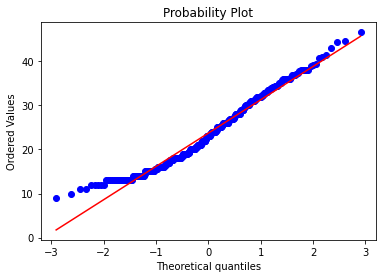

In [ ]:
from scipy import stats
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

Datada skewnesslık olup olmadığı qq plota bakılarak da anlaşılabilir.

Verinin kırmızı line üzerinde olsaydı normal dağılım sahip denilecekti.

Ancak uç noktalarda normalliğini kaybettiği görülür.

Skewnesslık değerini azaltabilmek için log transform yapılacaktır.

In [ ]:
data["target"] = np.log1p(data["target"])

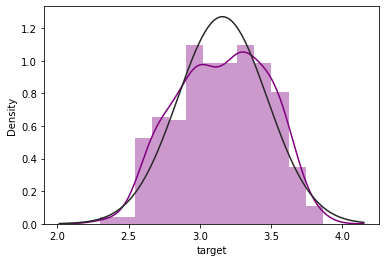

In [ ]:
from scipy.stats import norm
sns.distplot(data.target, fit = norm, color ="purple")
plt.show()

Skewnesslığın plota bakılarak yüksek oranda azaldığı görülür.

In [ ]:
(mu, sigma) = norm.fit(data["target"])
print("new mu (mean): {}, new sigma (standart sapma) = {}".format(mu, sigma))

new mu (mean): 3.158908786778425, new sigma (standart sapma) = 0.3140068082061331


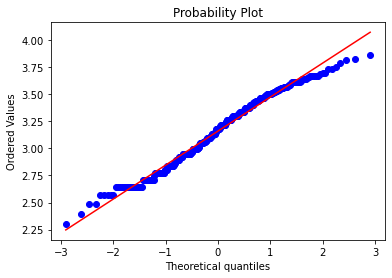

In [ ]:
from scipy import stats
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

Yeni veride yine uç noktalarda sıkıntı bulunmaktadır, ancak en baştaki kaymanın büyük oranda azaldığı görülür.

Quartile değerleri de azaldığından küçük farklılar çok önemli değildir.

target dependent variable'ının skewnesslığı düzeltilmiştir.

Independent variable'larının skewnesslığına bakılacaktır.

In [ ]:
from scipy.stats import skew
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
Origin,0.878695
Horsepower,0.871855
Displacement,0.696501
Cylinders,0.594028
Weight,0.562047
Acceleration,0.213869
Model Year,-0.005378
target,-0.123188


**Feature Engineering: One Hot Encoding**

One Hot Encoding yapılmazsa categorical veriler modeli bozacaktır.

In [ ]:
data["Cylinders"] = data["Cylinders"].astype(str)  
data["Origin"] = data["Origin"].astype(str) 

string object sınıfına girmektedir, categorical veriler de object olarak sınıflandırılır.

In [ ]:
data = pd.get_dummies(data)

get_dummies methodu categorical verileri one hot encoding'e sokar.

In [ ]:
data.head()

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


**Data Preprocessing**

In [ ]:
x = data.drop(["target"], axis = 1)
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.9, random_state = 42)

In [ ]:
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (38, 13)
x_test shape:  (342, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler =  RobustScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression**

Dependent variable ile independent variablelar arasında bir line fit etmeye yarayan yöntemdir.

Bu line **best fit straight line** ya da **regression line** olarak da adlandırılır.

Bu line'ı bulmak için kullanılan yönteme de **least squarred error** yöntemi denir.

Amaç least squarred error'u minimize etmeye çalışmaktır.

**b0** -> line fit edildiğinde y ekseninin kesildiği nokta

**b1** -> line'ın eğimi

**y_head = b0 + b1*x**

**y -> bağımlı değişken**

**x-> bağımsız değişken**

Bağımsız değişken ile bağımlı değişken tahmin edilmeye çalışılır.

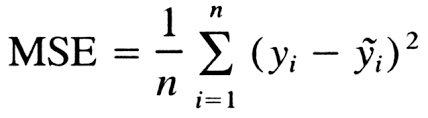

Mean Squarred Error azaldıkça gerçek değerler ile tahmin edilen değer arasındaki fark da azalacağından doğru bir tahmin gerçekleştirildiği anlamına gelir.

MSE'yi düşük tutabilmek için y = b0 + b1*x formülündeki en uygun b0 ve b1 değerleri bulunmalıdır. Çünkü bu formülden çıkan y değeri residual hesaplanırken kullanırken y değeridir.

In [ ]:
#model fit
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print("b1 (coef): ",lr.coef_)

b1 (coef):  [-1.29422255e-02 -2.79628071e-02 -3.05626303e-01  1.37195167e-02
  2.26309854e-01 -2.86397876e-01  9.92014614e-02  5.20417043e-18
  4.24310028e-02  1.44765412e-01 -6.76932296e-02  4.16446484e-02
  2.60485812e-02]


In [ ]:
from sklearn.metrics import mean_squared_error
y_head = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_head)
print("Linear Regression MSE: ",mse)

Linear Regression MSE:  0.013245238200341436


**Regularization 1: Ridge Regression (L2)**

Ridge Regression bir regularization tekniğidir, overfittingi engellemeye yardımcı olur.

L2 olarak da adlandırılabilir.

**Ridge Regression (L2) = least squared error + λ*(slope^2) değerini minimize etmeye çalışır.**

slope b1 (coefficient) değeridir.

Overfittingi engelleyerek test datasındaki mse düşürülür, daha iyi bir tahmin yapılır.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state = 42, max_iter = 10000)

In [ ]:
alphas = np.logspace(-4,-0.5,30)

Grid Search Cross Validation yöntemi ile en iyi alpha değerinin bulunması gerekir.

In [ ]:
tuned_parameters = [{'alpha':alphas}]
n_folds = 5

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
#refit parametresi true olduğundan clf bir daha kullanılabilir.
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

In [ ]:
print(scores)
print(scores_std)

[-0.02847057 -0.02846969 -0.02846853 -0.02846699 -0.02846497 -0.02846229
 -0.02845877 -0.02845412 -0.02844799 -0.02843992 -0.0284293  -0.02841534
 -0.028397   -0.02837297 -0.02834154 -0.02830056 -0.02824733 -0.02817853
 -0.02809015 -0.02797754 -0.02783544 -0.0276583  -0.02744067 -0.02717778
 -0.02686626 -0.02650473 -0.02609429 -0.02563854 -0.02514346 -0.02461726]
[0.00782276 0.00782232 0.00782175 0.007821   0.00782001 0.00781869
 0.00781696 0.00781468 0.00781167 0.00780769 0.00780246 0.00779556
 0.00778647 0.00777452 0.00775881 0.0077382  0.00771121 0.00767595
 0.00763003 0.00757048 0.00749366 0.00739523 0.0072702  0.00711316
 0.0069188  0.00668283 0.00640339 0.00608283 0.00572937 0.0053578 ]


In [ ]:
print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

Ridge Coef:  [-0.01270424 -0.04640395 -0.23152217  0.01027878  0.22462639 -0.19780755
  0.11442206  0.          0.00730653  0.07607896 -0.06771145  0.0429746
  0.02473684]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)


In [ ]:
y_head = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_head)
print("Ridge MSE: ",mse)

Ridge MSE:  0.013228871697722721


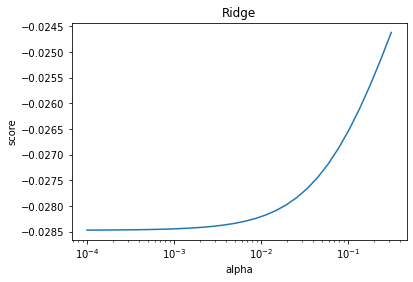

In [ ]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")
plt.show()

**Regularization 2: Lasso Regression (L1)**

L1 regularization olarak da adlandırılır.

**Lasso Regression (L1) = least squared error + λ*|slope| değerini minimize etmeye çalışır.**

Ridge Regression'a göre bazı avantajları vardır:

Feature selection yöntemi kullanılabilir, Ridge regression'dan farklı olarak gereksiz featurelara (coefficientlara) 0 değeri atanır.

Eğer bir independent variable'ın coefficient değeri 0 ise dependent variable'a etkisi yok demektir.

Diğer bir avantajı ise eğer high correlated featurelar (multicollinearity) varsa lasso regression'da bu featurelardan içlerinden en önemlisini kullanılır.

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

In [ ]:
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [ ]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [ ]:
print(scores)
print(scores_std)

[-0.02794439 -0.02782176 -0.02765952 -0.0274477  -0.02715242 -0.02676349
 -0.0263384  -0.02596912 -0.02564532 -0.02531536 -0.02494707 -0.02451728
 -0.02401869 -0.02374505 -0.02355784 -0.02297192 -0.02252663 -0.02238654
 -0.02290143 -0.02445328 -0.02764453 -0.03123888 -0.03718116 -0.04316185
 -0.04828682 -0.05601943 -0.06804584 -0.08955324 -0.11076929 -0.11475584]
[0.00766628 0.00759419 0.00750114 0.00738067 0.0072332  0.00704668
 0.00691105 0.00698043 0.0070991  0.00718218 0.00704069 0.0067564
 0.00626515 0.00551934 0.00488181 0.00490046 0.00529953 0.00617737
 0.00691989 0.00802123 0.01040071 0.01312585 0.01684304 0.01877556
 0.01762523 0.01623521 0.0152488  0.02016929 0.02701684 0.0246983 ]


In [ ]:
print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

Lasso Coef:  [-0.         -0.05406336 -0.18742499  0.          0.20310512 -0.
  0.13390391  0.         -0.          0.         -0.05358546  0.
  0.        ]
Lasso Best Estimator:  Lasso(alpha=0.011264816923358867, max_iter=10000, random_state=42)


Gereksiz olan featurelara 0 atandığı görülür.

In [ ]:
y_head = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_head)
print("Lasso MSE: ",mse)

Lasso MSE:  0.01220028217477629


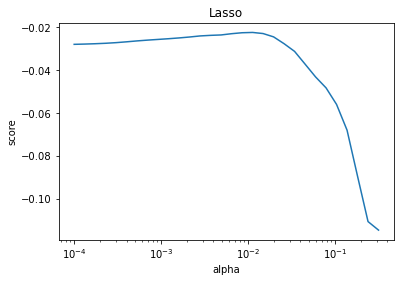

In [ ]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")
plt.show()

**Regularization 3: Elastic Net**

**Elastic Net = least squared error + λ(1)*|slope| + λ(2)*(slope^2) değerini minimize etmeye çalışır.**

Elastic Net, lasso regression ve ridge regression'ın kuvvetli yönlerine sahip olduğundan ikisinin karışımı gibi düşünülebilir.

Elastic Net highly correlated featurelarda iyi sonuçlar verir.

In [ ]:
from sklearn.linear_model import ElasticNet
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

In [ ]:
eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [ ]:
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

ElasticNet Coef:  [-0.04718546 -0.08468739 -0.11801076  0.          0.17335147 -0.03005753
  0.10351803  0.         -0.02027163 -0.         -0.06304547  0.01825107
  0.        ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.07880462815669913, l1_ratio=0.05, max_iter=10000,
           random_state=42)


In [ ]:
y_head = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_head)

print("ElasticNet MSE: ",mse)

ElasticNet MSE:  0.013083534532931781


StandardScaler sonuçları;

*    Linear Regression MSE:  0.013169465177392335
    
*    Ridge MSE:  0.013112049491260908
    
*    Lasso MSE:  0.011968492433523614
    
*    ElasticNet MSE:  0.012971531682055852

RobustScaler sonuçları;

*    Linear Regression MSE:  0.013245238200341436
    
*    Ridge MSE:  0.013228871697722721
    
*    Lasso MSE:  0.01220028217477629
    
*    ElasticNet MSE:  0.013083534532931781

**XGBoost**

XGBoost (eXtreme Gradient Boosting) büyük, karmaşık verisetleri için dizayn edilmiş bir algoritmadır.

Verideki her değeri incelemek yerine veriyi parçalara(quantile) böler ve bu parçalara göre çalışır.

In [ ]:
parametersGrid = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

**max_depth:** her bir ağacın ulaşacağı maksimum derinlik

**min_child_weight:** yeni bir düğüm oluşturmak için gerekli olan minimum ağırlıktır.

**subsample:** verideki sample'ların her bir ağaçta hangi yüzde ile kullanılacağını belirtir.

**colsample_bytree:** verideki feature'ların her bir ağaçta hangi yüzde ile kullanılacağını belirtir.

**objective:** regression problemleri için linear, sınıflandırma problemleri için logistic ataması yapılır.

In [ ]:
import xgboost as xgb
xgb.set_config(verbosity=0)
model_xgb = xgb.XGBRegressor()

In [ ]:
clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

In [ ]:
clf.fit(X_train, Y_train)
model_xgb = clf.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
y_head = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_head)
print("XGBRegressor MSE: ",mse)

XGBRegressor MSE:  0.015641519572463285


**Averaging Models**

XGBoost ve Lasso regression'ın ortalaması alınacaktır.

In [ ]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  

In [ ]:
from sklearn.base import clone
averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, Y_train)

In [ ]:
y_head = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_head)
print("Averaged Models MSE: ",mse)

Averaged Models MSE:  0.012269340486601306


XGB ve Lasso'nun sonuçları predict edilip, bu değerlerin ortalaması alınır.

Bu ortalama ile y_test karşılaştırılıp Mean Squarred Error elde edilir.

Tüm sonuçlar karşılaştırıldığında;

StandardScaler sonuçları;

*    Linear Regression MSE:  0.013169465177392335
    
*    Ridge MSE:  0.013112049491260908
    
*    Lasso MSE:  0.011968492433523614
    
*    ElasticNet MSE:  0.012971531682055852

*    XGBRegressor MSE:  0.01555591603124071

*    Averaged Models MSE:  0.01207335419790598

RobustScaler sonuçları;

*    Linear Regression MSE:  0.013245238200341436
    
*    Ridge MSE:  0.013228871697722721
    
*    Lasso MSE:  0.01220028217477629
    
*    ElasticNet MSE:  0.013083534532931781

*    XGBRegressor MSE:  0.015641519572463285

*    Averaged Models MSE:  0.012269340486601306

Az bir farkla Standard Scaler ile daha iyi sonuçlar elde edildiği gözlemlenir.